
class(day-40:9-7-20)
Hand-Written Digits Recognition


Data collection:

In [ ]:
#impoting libs:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [ ]:
## load_data-->return value is two tuples train and test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
print(test_digits.shape)

(10000, 28, 28)


In [ ]:

print(train_labels.shape)

(60000,)


to get the class wise counts

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:

pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:

pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

EDA

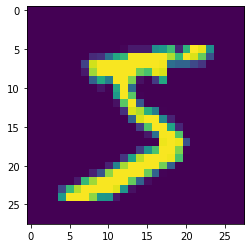

In [ ]:
plt.imshow(train_digits[0])

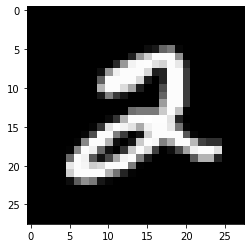

In [ ]:
plt.imshow(train_digits[5],cmap="gray")

Text(0.5, 1.0, 'DIGIT 3')

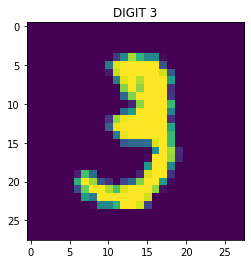

In [ ]:
plt.imshow(train_digits[10])
plt.title("DIGIT "+str(train_labels[10]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

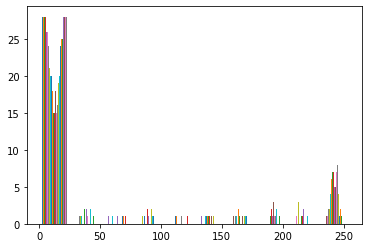

In [ ]:
plt.hist(train_digits[0])

(array([[28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105.,

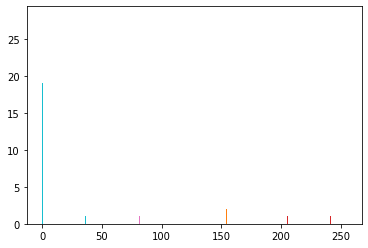

In [ ]:
plt.hist(train_digits[0],bins=255)

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

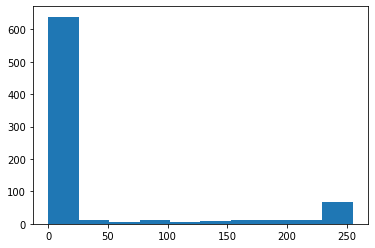

In [ ]:
plt.hist(train_digits[0].flat)

In [ ]:

samples=np.random.randint(train_digits.shape[0],size=16)
samples

array([46058, 58015, 38323,  1297,  8145, 19007, 48109, 40430,  1496,
       36920, 49850, 34691, 31434, 12641, 42966, 48650])

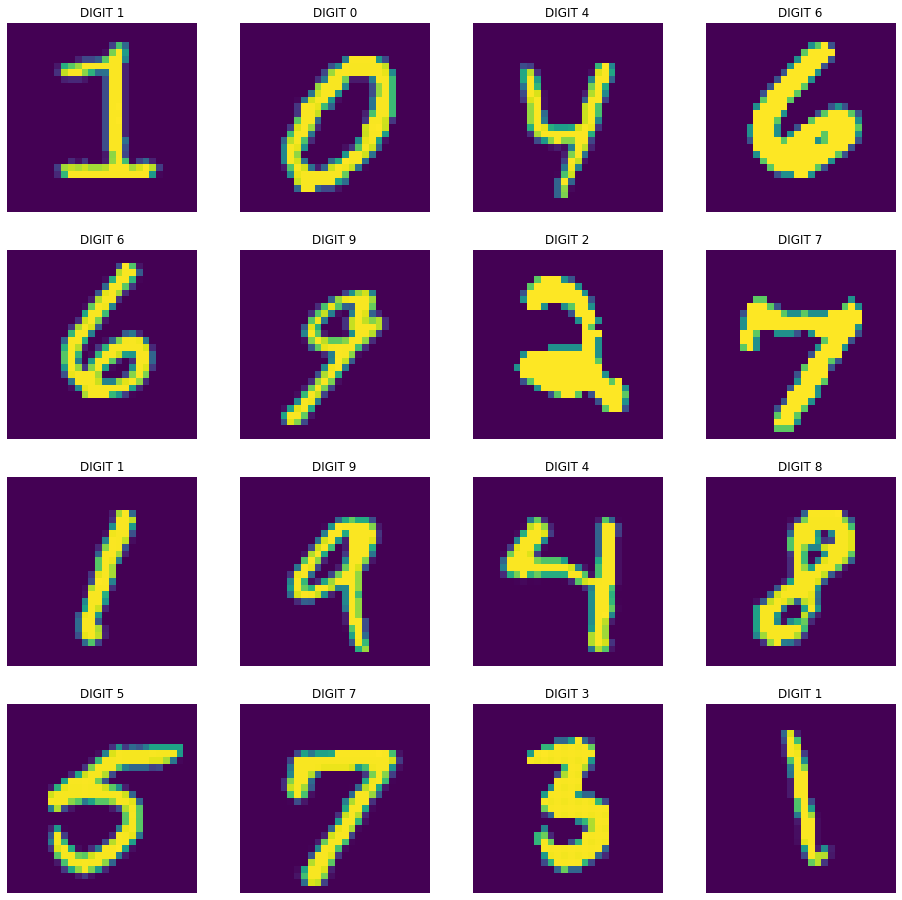

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("DIGIT "+str(train_labels[i]))
  plt.axis('off')
  j+=1

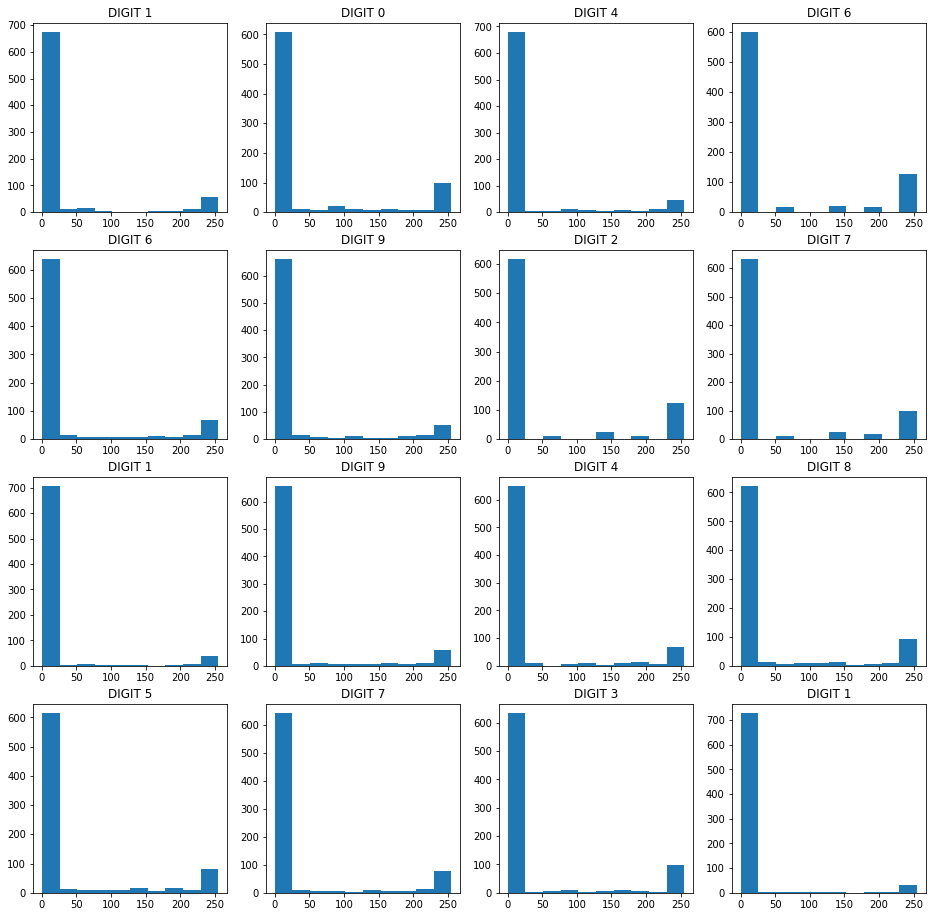

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("DIGIT "+str(train_labels[i]))
  j+=1

**Pre-processing**

**Scaling:**

In [ ]:
train_digits_sc= train_digits/255.0
test_digits_sc=test_digits/255.0

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Convert labels into CATEGORICAL VALUES:
from keras.utils import to_categorical
train_labels_cat=to_categorical(train_labels)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_cat=to_categorical(test_labels)
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**Splitting and Validating the data:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=54)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


**
Building and Training the MODEL**

In [ ]:
-we need to take 1d array as input for DENSE layer
-How many Hidden Layer?
-How many Neuron in each layer?
-what is the ACTIVATION FUNCTION for the Hiddem=n layers?
-How many neurons in the OUTPUT layer?
-What is the ACTIVATION function for output layer?


In [ ]:

#Build the Model:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
#Now, we are creating the skeleton(the structure of the model)
#how many hidden layers, how many neurons etc.
model= Sequential()
#first layer:
model.add(Flatten(input_shape=(28,28))) #input layer
#784 pixel values as input to DENSE . 128 Neurons in the Layers.
#hidden layers:
model.add(Dense(128,activation='relu')) #728*28+128(bias) #128 bias for 128 nodes
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
#final layer:
model.add(Dense(10,activation='softmax')) #10 because--> there are 10 classes in the output layer
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
Compile the MODEL
-what is the LOSS Func?
-What is the OPTIMIZER?
-What are the METRICS?

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

**Train the model**

In [ ]:

history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 187us/step - loss: 0.2781 - accuracy: 0.9146 - val_loss: 0.1711 - val_accuracy: 0.9503
Epoch 2/10
54000/54000 [==============================] - 9s 176us/step - loss: 0.1254 - accuracy: 0.9636 - val_loss: 0.1047 - val_accuracy: 0.9697
Epoch 3/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.0943 - accuracy: 0.9726 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 4/10
54000/54000 [==============================] - 9s 165us/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0857 - val_accuracy: 0.9738
Epoch 5/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.0645 - accuracy: 0.9811 - val_loss: 0.1042 - val_accuracy: 0.9707
Epoch 6/10
54000/54000 [==============================] - 12s 218us/step - loss: 0.0578 - accuracy: 0.9834 - val_loss: 0.0952 - val_accuracy: 0.9723
Epoch 7/10
54000/54000 [==============================] - 9s 

In [ ]:

model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 36us/step


[0.09520441760285757, 0.9778000116348267]

In [ ]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [ ]:

model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6466181e-17, 8.1906239e-11, 9.6417374e-10, 1.5010546e-09,
        9.1069234e-07, 2.2914446e-15, 3.1414953e-17, 9.9999690e-01,
        2.0580349e-10, 2.1014500e-06]], dtype=float32)

In [ ]:
model.predict(test_digits_sc[:10])

array([[3.64661812e-17, 8.19062387e-11, 9.64171853e-10, 1.50104895e-09,
        9.10691483e-07, 2.29143588e-15, 3.14148340e-17, 9.99996901e-01,
        2.05802722e-10, 2.10145026e-06],
       [5.46875822e-10, 2.57395022e-16, 1.00000000e+00, 9.32248931e-11,
        2.16804073e-13, 7.40262018e-13, 3.04276873e-12, 3.46613031e-14,
        8.13047444e-15, 1.80900797e-20],
       [2.24388094e-17, 9.99999404e-01, 5.78945891e-10, 8.04953413e-12,
        6.12997375e-10, 9.66597080e-11, 6.13805274e-12, 7.24446725e-10,
        5.88500313e-07, 6.77259464e-13],
       [9.99985695e-01, 9.86001323e-15, 2.61426379e-07, 2.49510720e-07,
        1.75504663e-11, 1.27208859e-05, 1.01179819e-06, 7.76045478e-11,
        6.93388402e-10, 1.68056733e-08],
       [3.75720913e-11, 6.66516231e-10, 6.70734295e-08, 5.50935903e-12,
        9.99999166e-01, 1.93141170e-09, 2.96454683e-08, 3.63940913e-08,
        8.49331716e-11, 7.24661163e-07],
       [1.37318823e-22, 1.00000000e+00, 2.19908483e-13, 3.24429818e-15,
   

In [ ]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [ ]:
model.predict_classes(test_digits_sc[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:

model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6466181e-17, 8.1906239e-11, 9.6417374e-10, 1.5010546e-09,
        9.1069234e-07, 2.2914446e-15, 3.1414953e-17, 9.9999690e-01,
        2.0580349e-10, 2.1014500e-06]], dtype=float32)

In [ ]:
history.history
#this is a dictionary

{'accuracy': [0.91455555,
  0.9635556,
  0.9725556,
  0.977,
  0.9811111,
  0.98337036,
  0.9857037,
  0.98657405,
  0.988,
  0.9895926],
 'loss': [0.27813295141414357,
  0.12542401235688616,
  0.09434405372505662,
  0.0778051335698304,
  0.06452824819048315,
  0.05776802030839543,
  0.04908311599838392,
  0.046182918936087475,
  0.041354082018428016,
  0.03646730654185133],
 'val_accuracy': [0.9503333568572998,
  0.9696666598320007,
  0.971833348274231,
  0.9738333225250244,
  0.9706666469573975,
  0.9723333120346069,
  0.9786666631698608,
  0.9750000238418579,
  0.9788333177566528,
  0.9801666736602783],
 'val_loss': [0.17106097165246806,
  0.1046557402126491,
  0.0948419502042234,
  0.08568146498439212,
  0.1042485453983148,
  0.0952437768081824,
  0.08574911494902335,
  0.10362057351569334,
  0.08598855422840763,
  0.08259190682989234]}

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

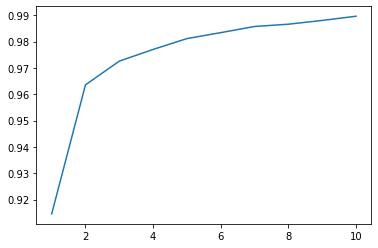

In [ ]:

plt.plot(range(1,11),history.history['accuracy'])

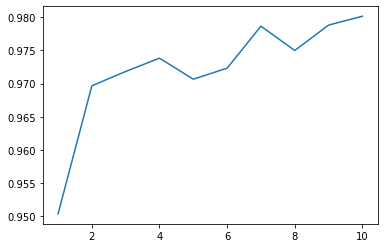

In [ ]:
plt.plot(range(1,11),history.history['val_accuracy'])

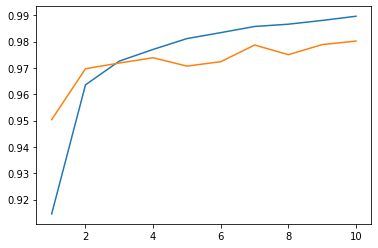

In [ ]:

plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])